In [2]:
import xarray as xr
import matplotlib.pyplot as plt
from glob import glob
import numpy as np
from karin import plot_karin_old
from datetime import datetime


In [3]:
def convert_swot_l3(ncfiles, area):
    
    # Merge all dataset
    def add_time_dim(xda):
        #xda = xda.expand_dims(satpass = [datetime.now()])
        xda = xda.expand_dims(satpass = [xda.time.mean().values])
        return xda
    
    drop_vars=['i_num_line','i_num_pixel']
    dsall = xr.open_mfdataset(ncfiles, preprocess=add_time_dim, 
                              drop_variables=drop_vars,
                             )

    # Subsample the area
    ds = dsall
    
    selection = (
        (ds.longitude > area[0]) &
        (ds.longitude < area[2]) &
        (ds.latitude > area[1]) &
        (ds.latitude < area[3]))
    selection = selection.compute()
    ds_area = ds.where(selection, drop=True)

    return ds_area

In [5]:
version = 'v2_0_1'

# region = 'pilbara'
# area = [112, -21.5, 118, -15] # Pilbara
# satpasses = ['034' ,'409' ,'381' ,'312' , '103',  '340']

# region = 'browsebasin'
# area = [120, -16, 125, -11] # Kimberley
# satpasses = ['353','256','047','534','325','228']

region = 'ningaloo'
area = [110, -24, 115.5, -18]
satpasses = ['187','465','159','437','131','409','103','118','396','090','368','062','340','034']

for satpass in satpasses:
    print(satpass)
    ncfiles = sorted(glob(f'/data/SWOT/l3_karin_nadir_{version}/cycle_0*/*_{satpass}_*.nc'))

    ds_area = convert_swot_l3(ncfiles, area)

    outfile='/data/SWOT/Karin_l3_{}_interim_science_{}_{}.nc'.format(version, satpass, region)
    print(outfile)
    ds_area.to_netcdf(outfile)

187
/data/SWOT/Karin_l3_v2_0_1_interim_science_187_ningaloo.nc
465
/data/SWOT/Karin_l3_v2_0_1_interim_science_465_ningaloo.nc
159
/data/SWOT/Karin_l3_v2_0_1_interim_science_159_ningaloo.nc
437
/data/SWOT/Karin_l3_v2_0_1_interim_science_437_ningaloo.nc
131
/data/SWOT/Karin_l3_v2_0_1_interim_science_131_ningaloo.nc
409
/data/SWOT/Karin_l3_v2_0_1_interim_science_409_ningaloo.nc
103
/data/SWOT/Karin_l3_v2_0_1_interim_science_103_ningaloo.nc
118
/data/SWOT/Karin_l3_v2_0_1_interim_science_118_ningaloo.nc
396
/data/SWOT/Karin_l3_v2_0_1_interim_science_396_ningaloo.nc
090
/data/SWOT/Karin_l3_v2_0_1_interim_science_090_ningaloo.nc
368
/data/SWOT/Karin_l3_v2_0_1_interim_science_368_ningaloo.nc
062
/data/SWOT/Karin_l3_v2_0_1_interim_science_062_ningaloo.nc
340
/data/SWOT/Karin_l3_v2_0_1_interim_science_340_ningaloo.nc
034
/data/SWOT/Karin_l3_v2_0_1_interim_science_034_ningaloo.nc


In [6]:
swotregions = dict()
region = 'pilbara'
area = [112, -21.5, 118, -15] # Pilbara
satpasses = ['034' ,'409' ,'381' ,'312' , '103',  '340']
swotregions.update({region:{'area':area, 'satpasses':satpasses}})

region = 'browsebasin'
area = [120, -16, 125, -11] # Kimberley
satpasses = ['353','256','047','534','325','228']
swotregions.update({region:{'area':area, 'satpasses':satpasses}})

region = 'ningaloo'
area = [110, -24, 115.5, -18]
satpasses = ['187','465','159','437','131','409','103','118','396','090','368','062','340','034']

swotregions.update({region:{'area':area, 'satpasses':satpasses}})

swotregions

{'pilbara': {'area': [112, -21.5, 118, -15],
  'satpasses': ['034', '409', '381', '312', '103', '340']},
 'browsebasin': {'area': [120, -16, 125, -11],
  'satpasses': ['353', '256', '047', '534', '325', '228']},
 'ningaloo': {'area': [110, -24, 115.5, -18],
  'satpasses': ['187',
   '465',
   '159',
   '437',
   '131',
   '409',
   '103',
   '118',
   '396',
   '090',
   '368',
   '062',
   '340',
   '034']}}

## Old stuff

In [5]:
# version = 'v0_2_0'
#version = 'v0_3_0'
#version = 'v1_0_0'
version = 'v2_0'


# region = 'browsebasin'
# area = [120, -16, 125, -11] # Kimberley
# satpass = '534' #'228' #'325' #'534' #'047' #'256' #'353' #256 047 534 325 228
# ncfiles = sorted(glob(f'/home/jupyter-mrayson/data/SWOT/l3_karin_nadir_v2_0/cycle_0*/*_{satpass}_*.nc'))

region = 'pilbara'
area = [112, -21.5, 118, -15] # Pilbara
satpass = '034' #'409' #'381' #'312' # '103' '312' '034' '340'
ncfiles = sorted(glob(f'/data/SWOT/l3_karin_nadir_{version}/cycle_0*/*_{satpass}_*.nc'))

# region = 'lombok'
# area = [114, -12, 117.5, -8.8] 
# satpass = 437 #437 131 006 409 034 312
# ncfiles = sorted(glob(f'/home/jupyter-mrayson/data/SWOT/l3_karin_nadir_v2_0/cycle_0*/*_{satpass}_*.nc'))

# region = 'brunei'
# area = [109, 3, 113, 9] 
# ncfiles = sorted(glob('/home/jupyter-mrayson/data/SWOT/l3_karin_nadir/*_008*.nc'))

# region = 'southchinasea'
# area = [108, 9, 113, 18] 
# ncfiles = sorted(glob('/home/jupyter-mrayson/data/SWOT/l3_karin_nadir/*_008*.nc'))

# region = 'indoseas_pass021'
# area = [108, -11, 135, 9] 
# ncfiles = sorted(glob('/home/jupyter-mrayson/data/SWOT/l3_karin_nadir_v0_3/*_021*.nc'))

# region = 'ningaloo_pass062'
# area = [113, -23, 115, -20.5] # Ningaloo
# ncfiles = sorted(glob('/home/jupyter-mrayson/data/SWOT/l3_karin_nadir_v1_0/cycle_0*/*_062*.nc'))

# region = 'ningaloo_pass131'
# area = [113, -23, 115, -20.5] # Ningaloo
# ncfiles = sorted(glob('/home/jupyter-mrayson/data/SWOT/l3_karin_nadir_v1_0/cycle_0*/*_131*.nc'))
ncfiles

['/data/SWOT/l3_karin_nadir_v2_0_1/cycle_002/SWOT_L3_LR_SSH_Expert_002_034_20230812T063638_20230812T072804_v2.0.1.nc',
 '/data/SWOT/l3_karin_nadir_v2_0_1/cycle_003/SWOT_L3_LR_SSH_Expert_003_034_20230902T032143_20230902T041309_v2.0.1.nc',
 '/data/SWOT/l3_karin_nadir_v2_0_1/cycle_005/SWOT_L3_LR_SSH_Expert_005_034_20231013T205150_20231013T214317_v2.0.1.nc',
 '/data/SWOT/l3_karin_nadir_v2_0_1/cycle_006/SWOT_L3_LR_SSH_Expert_006_034_20231103T173656_20231103T182822_v2.0.1.nc',
 '/data/SWOT/l3_karin_nadir_v2_0_1/cycle_007/SWOT_L3_LR_SSH_Expert_007_034_20231124T142201_20231124T151327_v2.0.1.nc',
 '/data/SWOT/l3_karin_nadir_v2_0_1/cycle_008/SWOT_L3_LR_SSH_Expert_008_034_20231215T110704_20231215T115831_v2.0.1.nc',
 '/data/SWOT/l3_karin_nadir_v2_0_1/cycle_009/SWOT_L3_LR_SSH_Expert_009_034_20240105T075211_20240105T084338_v2.0.1.nc',
 '/data/SWOT/l3_karin_nadir_v2_0_1/cycle_010/SWOT_L3_LR_SSH_Expert_010_034_20240126T043717_20240126T052843_v2.0.1.nc',
 '/data/SWOT/l3_karin_nadir_v2_0_1/cycle_011/SWO

In [6]:
ds = xr.open_dataset(ncfiles[0])
ds

<xarray.Dataset> Size: 99MB
Dimensions:               (num_lines: 9860, num_pixels: 69, num_nadir: 1145)
Coordinates:
    latitude              (num_lines, num_pixels) float64 5MB ...
    longitude             (num_lines, num_pixels) float64 5MB ...
Dimensions without coordinates: num_lines, num_pixels, num_nadir
Data variables: (12/21)
    time                  (num_lines) datetime64[ns] 79kB ...
    calibration           (num_lines, num_pixels) float64 5MB ...
    cross_track_distance  (num_pixels) float64 552B ...
    dac                   (num_lines, num_pixels) float64 5MB ...
    internal_tide         (num_lines, num_pixels) float64 5MB ...
    mdt                   (num_lines, num_pixels) float64 5MB ...
    ...                    ...
    ugosa_unfiltered      (num_lines, num_pixels) float64 5MB ...
    vgos_filtered         (num_lines, num_pixels) float64 5MB ...
    vgosa_filtered        (num_lines, num_pixels) float64 5MB ...
    vgosa_unfiltered      (num_lines, num_pixels) float64 5MB ...
    i_num_line            (num_nadir) int16 2kB ...
    i_num_pixel           (num_nadir) int8 1kB ...
Attributes: (12/42)
    Conventions:                     CF-1.7
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Swath
    comment:                         Sea Surface Height measured by Altimetry
    data_used:                       SWOT KaRIn L2_LR_SSH PGC0/PIC0/PIC2 (NAS...
    doi:                             https://doi.org/10.24400/527896/A01-2023...
    ...                              ...
    geospatial_lon_min:              29.450555
    geospatial_lon_max:              196.380004
    date_modified:                   2025-03-04T23:53:25Z
    history:                         2025-03-04T23:53:25Z: Created by DUACS K...
    date_created:                    2025-03-04T23:53:25Z
    date_issued:                     2025-03-04T23:53:25Z

In [7]:
# Merge all dataset

from datetime import datetime
def add_time_dim(xda):
    #xda = xda.expand_dims(satpass = [datetime.now()])
    xda = xda.expand_dims(satpass = [xda.time.mean().values])
    return xda

drop_vars=['i_num_line','i_num_pixel']
dsall = xr.open_mfdataset(ncfiles, preprocess=add_time_dim, 
                          drop_variables=drop_vars,
                         )
dsall

<xarray.Dataset> Size: 3GB
Dimensions:               (satpass: 29, num_lines: 9860, num_pixels: 69)
Coordinates:
  * satpass               (satpass) datetime64[ns] 232B 2023-08-12T07:02:20.0...
    latitude              (num_lines, num_pixels) float64 5MB dask.array<chunksize=(9860, 69), meta=np.ndarray>
    longitude             (num_lines, num_pixels) float64 5MB dask.array<chunksize=(9860, 69), meta=np.ndarray>
Dimensions without coordinates: num_lines, num_pixels
Data variables: (12/19)
    time                  (satpass, num_lines) datetime64[ns] 2MB dask.array<chunksize=(1, 9860), meta=np.ndarray>
    calibration           (satpass, num_lines, num_pixels) float64 158MB dask.array<chunksize=(1, 9860, 69), meta=np.ndarray>
    cross_track_distance  (satpass, num_pixels) float64 16kB dask.array<chunksize=(1, 69), meta=np.ndarray>
    dac                   (satpass, num_lines, num_pixels) float64 158MB dask.array<chunksize=(1, 9860, 69), meta=np.ndarray>
    internal_tide         (satpass, num_lines, num_pixels) float64 158MB dask.array<chunksize=(1, 9860, 69), meta=np.ndarray>
    mdt                   (satpass, num_lines, num_pixels) float64 158MB dask.array<chunksize=(1, 9860, 69), meta=np.ndarray>
    ...                    ...
    ugos_filtered         (satpass, num_lines, num_pixels) float64 158MB dask.array<chunksize=(1, 9860, 69), meta=np.ndarray>
    ugosa_filtered        (satpass, num_lines, num_pixels) float64 158MB dask.array<chunksize=(1, 9860, 69), meta=np.ndarray>
    ugosa_unfiltered      (satpass, num_lines, num_pixels) float64 158MB dask.array<chunksize=(1, 9860, 69), meta=np.ndarray>
    vgos_filtered         (satpass, num_lines, num_pixels) float64 158MB dask.array<chunksize=(1, 9860, 69), meta=np.ndarray>
    vgosa_filtered        (satpass, num_lines, num_pixels) float64 158MB dask.array<chunksize=(1, 9860, 69), meta=np.ndarray>
    vgosa_unfiltered      (satpass, num_lines, num_pixels) float64 158MB dask.array<chunksize=(1, 9860, 69), meta=np.ndarray>
Attributes: (12/42)
    Conventions:                     CF-1.7
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Swath
    comment:                         Sea Surface Height measured by Altimetry
    data_used:                       SWOT KaRIn L2_LR_SSH PGC0/PIC0/PIC2 (NAS...
    doi:                             https://doi.org/10.24400/527896/A01-2023...
    ...                              ...
    geospatial_lon_min:              29.450555
    geospatial_lon_max:              196.380004
    date_modified:                   2025-03-04T23:53:25Z
    history:                         2025-03-04T23:53:25Z: Created by DUACS K...
    date_created:                    2025-03-04T23:53:25Z
    date_issued:                     2025-03-04T23:53:25Z

In [8]:
# Subsample
ds = dsall

selection = (
    (ds.longitude > area[0]) &
    (ds.longitude < area[2]) &
    (ds.latitude > area[1]) &
    (ds.latitude < area[3]))
selection = selection.compute()
ds_area = ds.where(selection, drop=True)
ds_area

<xarray.Dataset> Size: 112MB
Dimensions:               (satpass: 29, num_lines: 376, num_pixels: 69)
Coordinates:
  * satpass               (satpass) datetime64[ns] 232B 2023-08-12T07:02:20.0...
    latitude              (num_lines, num_pixels) float64 208kB -14.81 ... -21.7
    longitude             (num_lines, num_pixels) float64 208kB 115.9 ... 115.7
Dimensions without coordinates: num_lines, num_pixels
Data variables: (12/19)
    time                  (satpass, num_lines, num_pixels) datetime64[ns] 6MB dask.array<chunksize=(1, 376, 69), meta=np.ndarray>
    calibration           (satpass, num_lines, num_pixels) float64 6MB dask.array<chunksize=(1, 376, 69), meta=np.ndarray>
    cross_track_distance  (satpass, num_pixels, num_lines) float64 6MB dask.array<chunksize=(1, 69, 376), meta=np.ndarray>
    dac                   (satpass, num_lines, num_pixels) float64 6MB dask.array<chunksize=(1, 376, 69), meta=np.ndarray>
    internal_tide         (satpass, num_lines, num_pixels) float64 6MB dask.array<chunksize=(1, 376, 69), meta=np.ndarray>
    mdt                   (satpass, num_lines, num_pixels) float64 6MB dask.array<chunksize=(1, 376, 69), meta=np.ndarray>
    ...                    ...
    ugos_filtered         (satpass, num_lines, num_pixels) float64 6MB dask.array<chunksize=(1, 376, 69), meta=np.ndarray>
    ugosa_filtered        (satpass, num_lines, num_pixels) float64 6MB dask.array<chunksize=(1, 376, 69), meta=np.ndarray>
    ugosa_unfiltered      (satpass, num_lines, num_pixels) float64 6MB dask.array<chunksize=(1, 376, 69), meta=np.ndarray>
    vgos_filtered         (satpass, num_lines, num_pixels) float64 6MB dask.array<chunksize=(1, 376, 69), meta=np.ndarray>
    vgosa_filtered        (satpass, num_lines, num_pixels) float64 6MB dask.array<chunksize=(1, 376, 69), meta=np.ndarray>
    vgosa_unfiltered      (satpass, num_lines, num_pixels) float64 6MB dask.array<chunksize=(1, 376, 69), meta=np.ndarray>
Attributes: (12/42)
    Conventions:                     CF-1.7
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Swath
    comment:                         Sea Surface Height measured by Altimetry
    data_used:                       SWOT KaRIn L2_LR_SSH PGC0/PIC0/PIC2 (NAS...
    doi:                             https://doi.org/10.24400/527896/A01-2023...
    ...                              ...
    geospatial_lon_min:              29.450555
    geospatial_lon_max:              196.380004
    date_modified:                   2025-03-04T23:53:25Z
    history:                         2025-03-04T23:53:25Z: Created by DUACS K...
    date_created:                    2025-03-04T23:53:25Z
    date_issued:                     2025-03-04T23:53:25Z

In [9]:
%%time
#ds_area.to_netcdf('/home/jupyter-mrayson/data/SWOT/Karin_l3_{}_complete_calval_{}.nc'.format(version, region))
outfile='/data/SWOT/Karin_l3_{}_interim_science_{}_{}.nc'.format(version, satpass, region)
ds_area.to_netcdf(outfile)
outfile

CPU times: user 5.99 s, sys: 2.62 s, total: 8.62 s
Wall time: 12.1 s


'/data/SWOT/Karin_l3_v2_0_1_interim_science_034_pilbara.nc'

(<Figure size 600x400 with 4 Axes>,
 <Axes: title={'center': '2024-03-07T22:33:08.063214568'}, xlabel='longitude (degrees East)\n[degrees_east]', ylabel='latitude (positive N, negative\nS) [degrees_north]'>,
 <Axes: xlabel='longitude (degrees East)\n[degrees_east]'>)

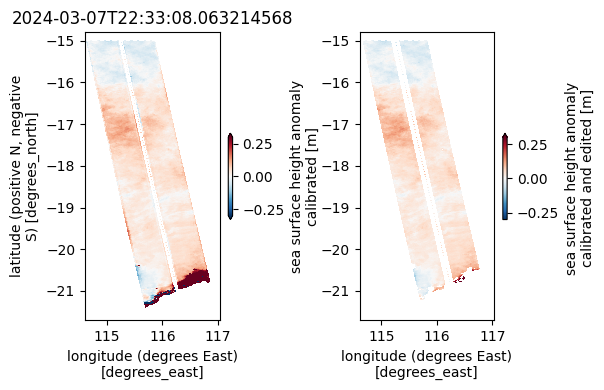

In [10]:
plot_karin_old(ds_area,9, var1='ssha_unedited',var2='ssha_unfiltered')

../FIGURES/SWOT/SWOT_Karin_l3_v2_0_1_034_pilbara_2023-08-12.png
../FIGURES/SWOT/SWOT_Karin_l3_v2_0_1_034_pilbara_2023-09-02.png
../FIGURES/SWOT/SWOT_Karin_l3_v2_0_1_034_pilbara_2023-10-13.png
../FIGURES/SWOT/SWOT_Karin_l3_v2_0_1_034_pilbara_2023-11-03.png
../FIGURES/SWOT/SWOT_Karin_l3_v2_0_1_034_pilbara_2023-11-24.png
../FIGURES/SWOT/SWOT_Karin_l3_v2_0_1_034_pilbara_2023-12-15.png
../FIGURES/SWOT/SWOT_Karin_l3_v2_0_1_034_pilbara_2024-01-05.png
../FIGURES/SWOT/SWOT_Karin_l3_v2_0_1_034_pilbara_2024-01-26.png
../FIGURES/SWOT/SWOT_Karin_l3_v2_0_1_034_pilbara_2024-02-16.png
../FIGURES/SWOT/SWOT_Karin_l3_v2_0_1_034_pilbara_2024-03-07.png
../FIGURES/SWOT/SWOT_Karin_l3_v2_0_1_034_pilbara_2024-03-28.png
../FIGURES/SWOT/SWOT_Karin_l3_v2_0_1_034_pilbara_2024-04-18.png
../FIGURES/SWOT/SWOT_Karin_l3_v2_0_1_034_pilbara_2024-05-09.png
../FIGURES/SWOT/SWOT_Karin_l3_v2_0_1_034_pilbara_2024-05-30.png
../FIGURES/SWOT/SWOT_Karin_l3_v2_0_1_034_pilbara_2024-06-20.png
../FIGURES/SWOT/SWOT_Karin_l3_v2_0_1_034

/data/ProjectsActive/SWOT_NAust/NOTEBOOKS/karin.py:135: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 4))


../FIGURES/SWOT/SWOT_Karin_l3_v2_0_1_034_pilbara_2024-10-23.png
../FIGURES/SWOT/SWOT_Karin_l3_v2_0_1_034_pilbara_2024-11-13.png
../FIGURES/SWOT/SWOT_Karin_l3_v2_0_1_034_pilbara_2024-12-04.png
../FIGURES/SWOT/SWOT_Karin_l3_v2_0_1_034_pilbara_2024-12-25.png
../FIGURES/SWOT/SWOT_Karin_l3_v2_0_1_034_pilbara_2025-01-14.png
../FIGURES/SWOT/SWOT_Karin_l3_v2_0_1_034_pilbara_2025-02-04.png
../FIGURES/SWOT/SWOT_Karin_l3_v2_0_1_034_pilbara_2025-02-25.png
../FIGURES/SWOT/SWOT_Karin_l3_v2_0_1_034_pilbara_2025-03-18.png
../FIGURES/SWOT/SWOT_Karin_l3_v2_0_1_034_pilbara_2025-04-08.png


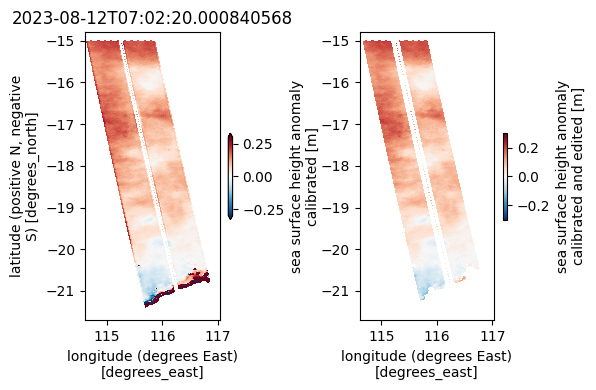

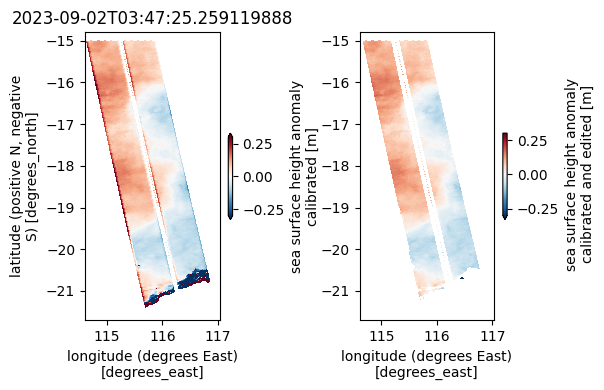

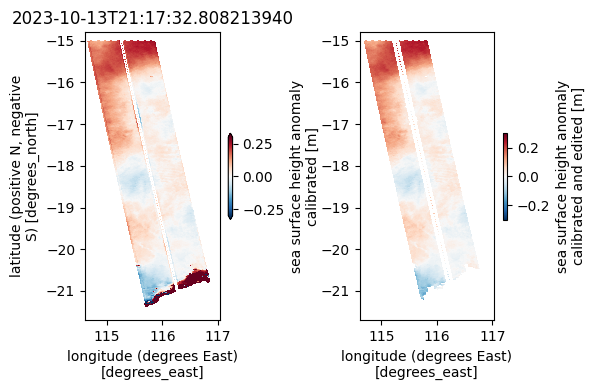

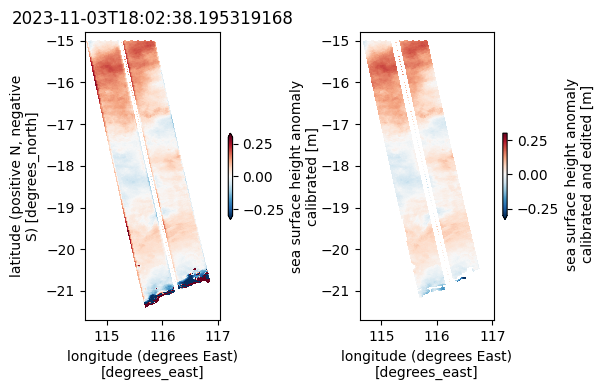

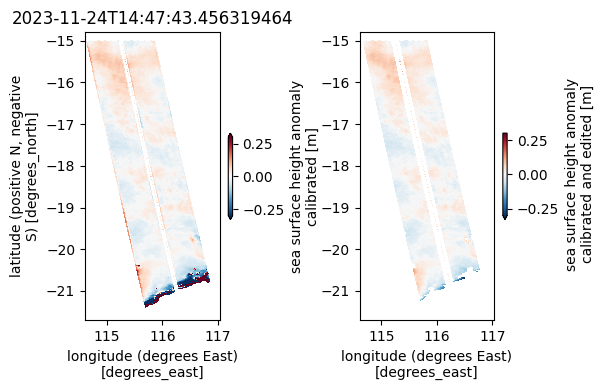

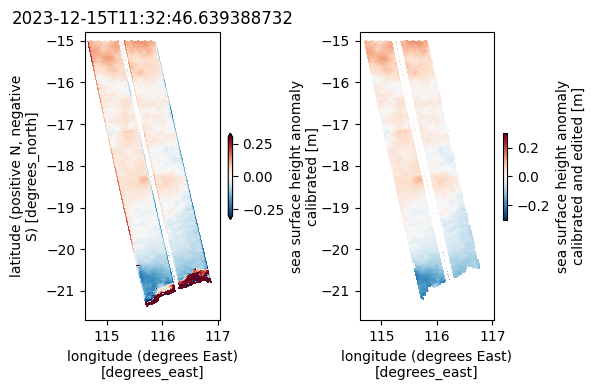

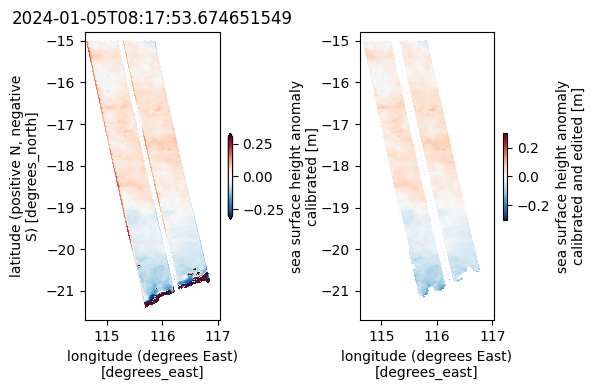

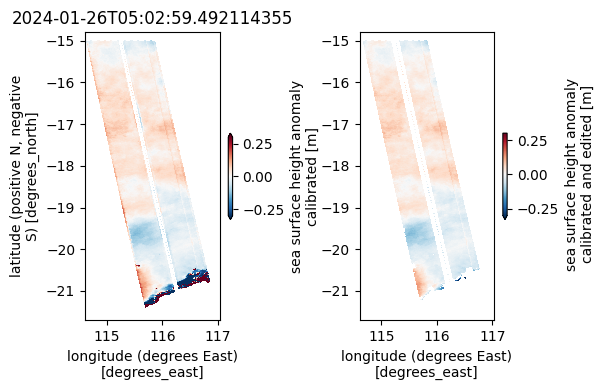

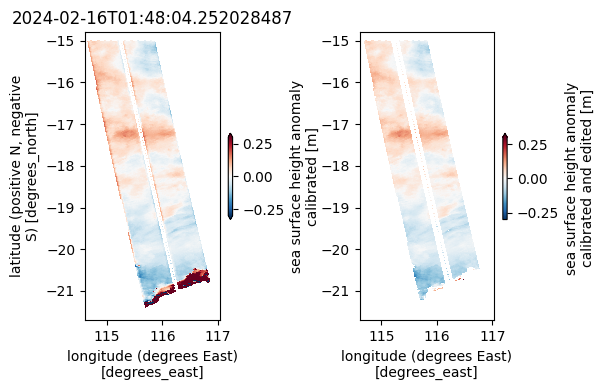

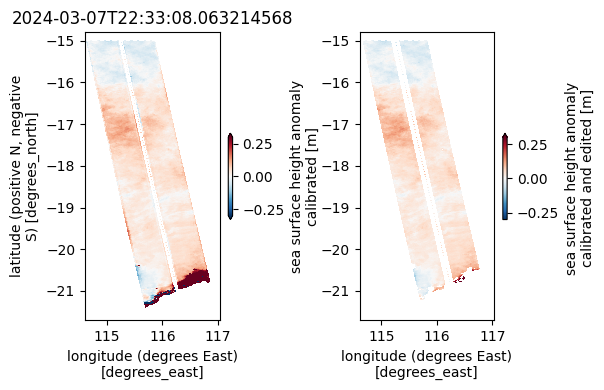

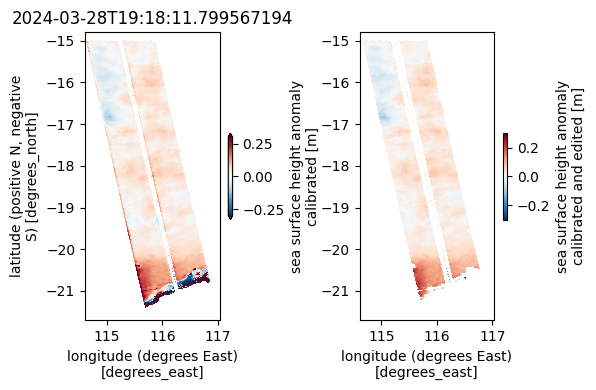

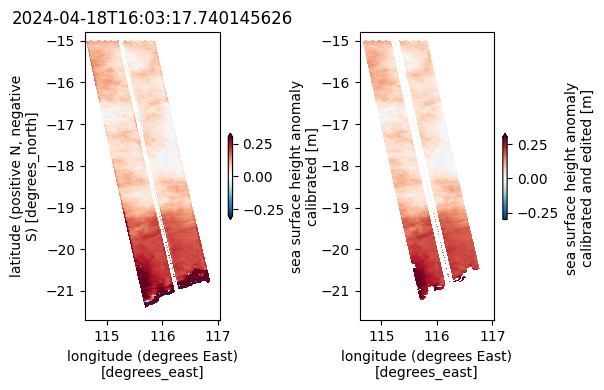

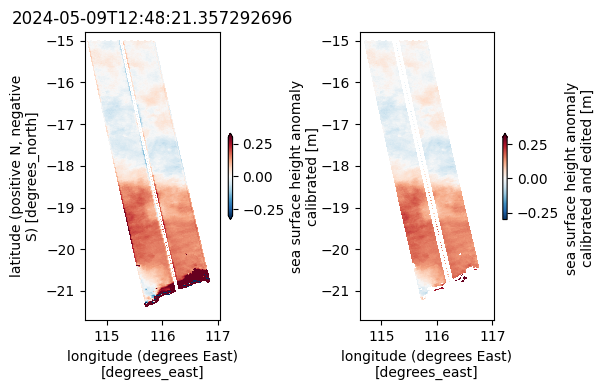

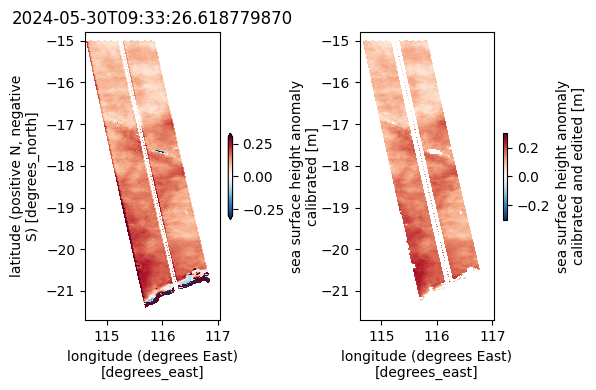

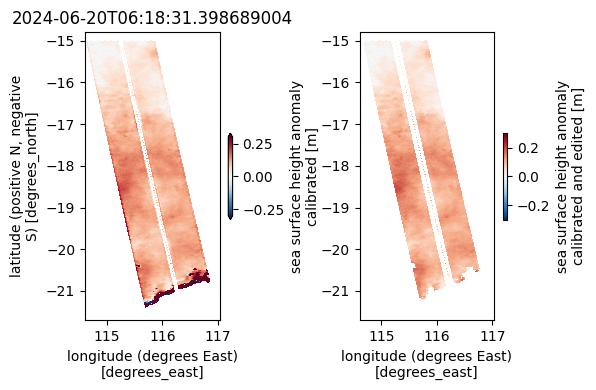

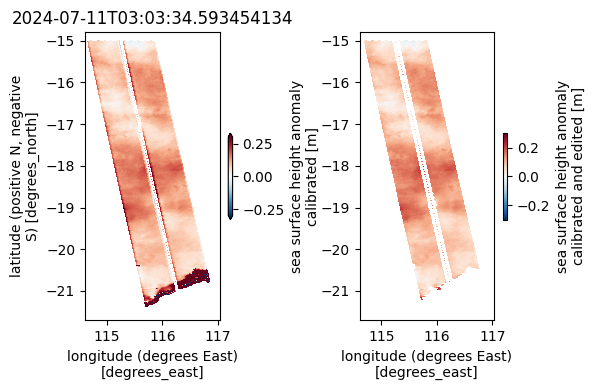

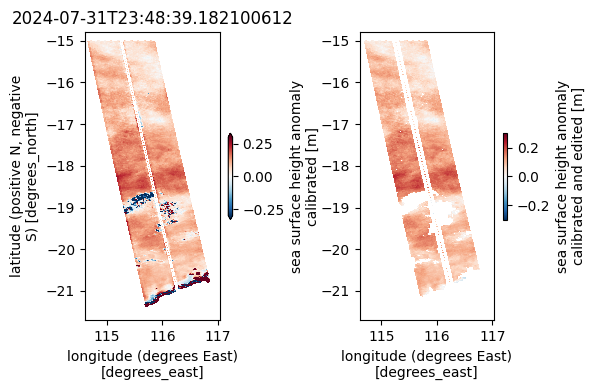

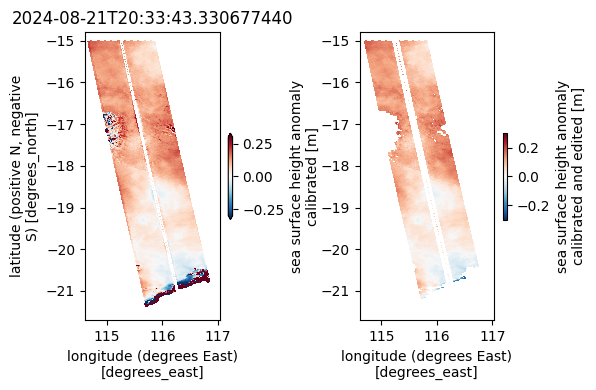

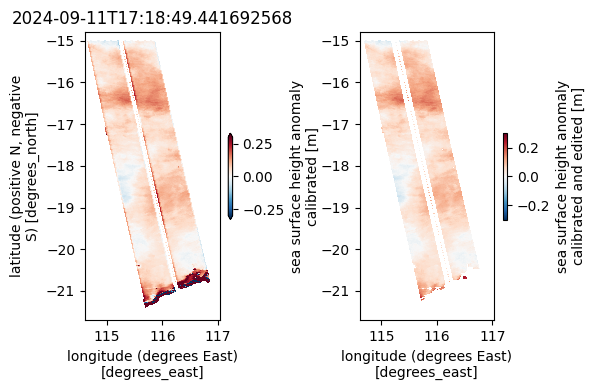

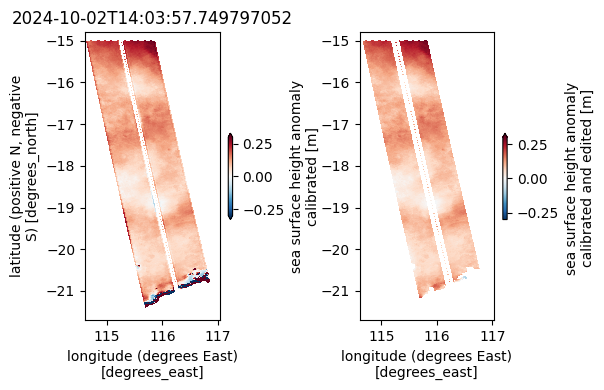

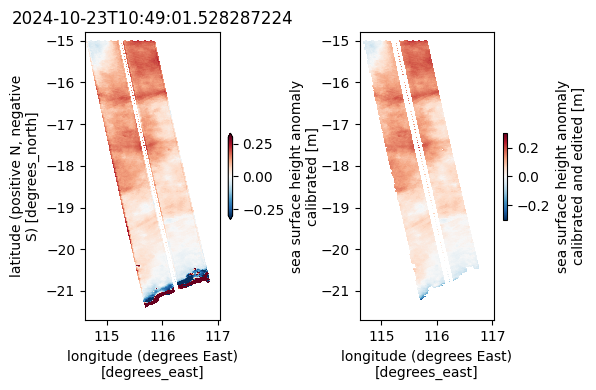

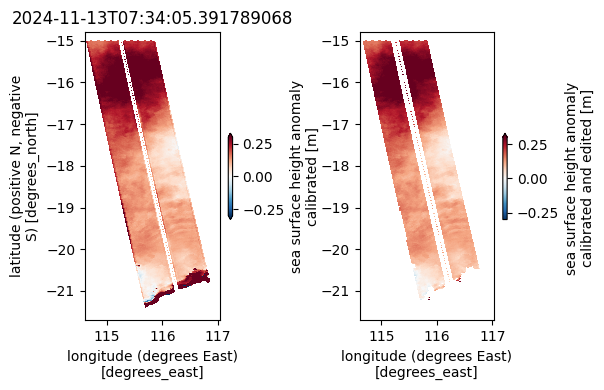

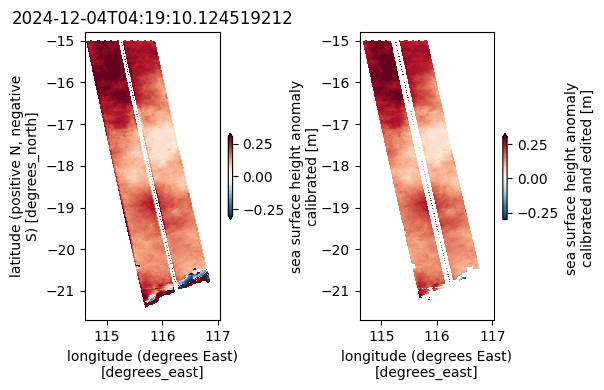

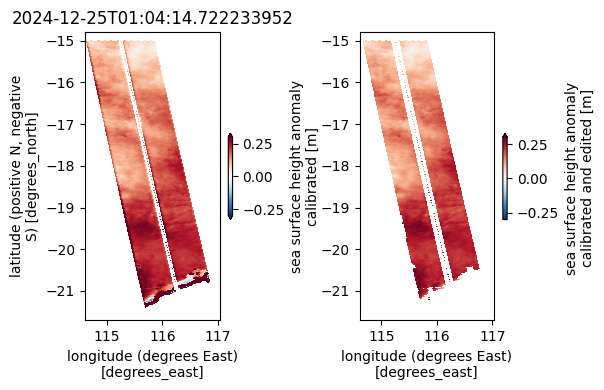

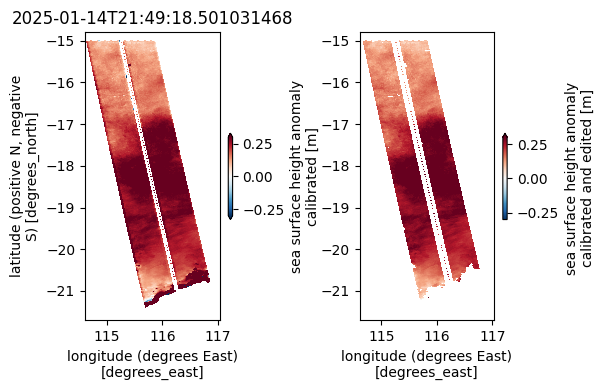

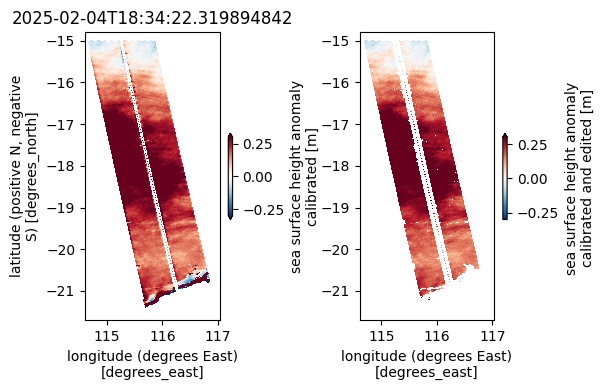

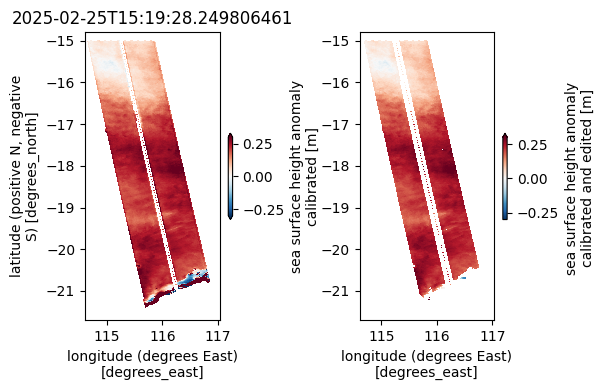

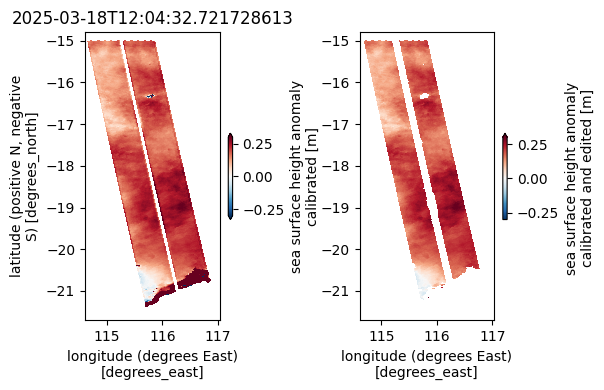

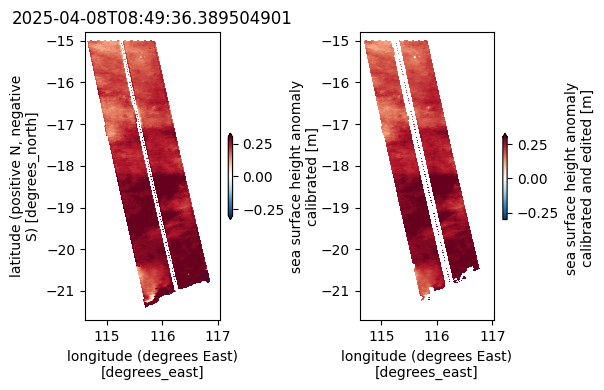

In [11]:
for ii in range(len(ncfiles)):
    outfile = '../FIGURES/SWOT/SWOT_Karin_l3_{}_{}_{}_{}.png'.\
        format(version, satpass, region, ds_area.satpass.values[ii].astype(str)[0:10])
    fig,_,_ =plot_karin_old(ds_area,ii, var1='ssha_unedited',var2='ssha_unfiltered', outfile=outfile)
    
    print(outfile)
    del fig

In [46]:
ds_area

<xarray.Dataset>
Dimensions:               (satpass: 28, num_lines: 186, num_pixels: 69)
Coordinates:
  * satpass               (satpass) datetime64[ns] 2023-08-04T19:49:56.251565...
    latitude              (num_lines, num_pixels) float64 -11.99 ... -8.867
    longitude             (num_lines, num_pixels) float64 116.1 116.1 ... 117.8
Dimensions without coordinates: num_lines, num_pixels
Data variables: (12/19)
    time                  (satpass, num_lines, num_pixels) datetime64[ns] dask.array<chunksize=(1, 186, 69), meta=np.ndarray>
    calibration           (satpass, num_lines, num_pixels) float64 dask.array<chunksize=(1, 186, 69), meta=np.ndarray>
    cross_track_distance  (satpass, num_pixels, num_lines) float64 dask.array<chunksize=(1, 69, 186), meta=np.ndarray>
    dac                   (satpass, num_lines, num_pixels) float32 dask.array<chunksize=(1, 186, 69), meta=np.ndarray>
    internal_tide         (satpass, num_lines, num_pixels) float64 dask.array<chunksize=(1, 186, 69), meta=np.ndarray>
    mdt                   (satpass, num_lines, num_pixels) float64 dask.array<chunksize=(1, 186, 69), meta=np.ndarray>
    ...                    ...
    ugos                  (satpass, num_lines, num_pixels) float64 dask.array<chunksize=(1, 186, 69), meta=np.ndarray>
    ugosa_filtered        (satpass, num_lines, num_pixels) float64 dask.array<chunksize=(1, 186, 69), meta=np.ndarray>
    ugosa_unfiltered      (satpass, num_lines, num_pixels) float64 dask.array<chunksize=(1, 186, 69), meta=np.ndarray>
    vgos                  (satpass, num_lines, num_pixels) float64 dask.array<chunksize=(1, 186, 69), meta=np.ndarray>
    vgosa_filtered        (satpass, num_lines, num_pixels) float64 dask.array<chunksize=(1, 186, 69), meta=np.ndarray>
    vgosa_unfiltered      (satpass, num_lines, num_pixels) float64 dask.array<chunksize=(1, 186, 69), meta=np.ndarray>
Attributes: (12/42)
    Conventions:                     CF-1.7
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    cdm_data_type:                   Swath
    comment:                         Sea Surface Height measured by Altimetry
    data_used:                       SWOT KaRIn L2_LR_SSH PGC0/PIC0/PIC2 (NAS...
    doi:                             https://doi.org/10.24400/527896/A01-2023...
    ...                              ...
    geospatial_lon_min:              34.982333
    geospatial_lon_max:              201.913324
    date_modified:                   2025-01-07T15:21:50Z
    history:                         2025-01-07T15:21:50Z: Created by DUACS K...
    date_created:                    2025-01-07T15:21:50Z
    date_issued:                     2025-01-07T15:21:50Z

In [47]:
dt = ds_area.satpass[-1].values -ds_area.satpass[-2].values 
dt_days = dt.astype(float)*1e-9/86400
dt_days

20.864636664541635

In [27]:
fac=1
sig_m2 = fac/(12.42/24)
sig_s2 = fac/(12./24)

np.abs(sig_m2-sig_s2)

0.06763285024154575

In [21]:
1/np.abs(sig_m2-sig_s2)

14.785714285714317

In [22]:
1/(12.0/24-0.5*23.83/24)

282.3529411764663

In [23]:
f=12.42/24
fnyq = 0.5*(23.83/24)
f, fnyq

(0.5175, 0.4964583333333333)

In [88]:
f-fnyq

0.02104166666666668